In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import os
import cv2 as cv

In [2]:
who = {
    0:'Catto',
    1:'Doggo'
}

In [3]:
filenames = os.listdir("train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [4]:
for i in range(100):
    df = df.sample(frac = 1) 
df

,filename,category
5142,cat.3376.jpg,0
7575,cat.5566.jpg,0
16996,dog.2795.jpg,1
22275,dog.7546.jpg,1
10946,cat.860.jpg,0
...,...,...
3515,cat.1911.jpg,0
1490,cat.11338.jpg,0
12199,cat.9728.jpg,0
19437,dog.4992.jpg,1


In [5]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

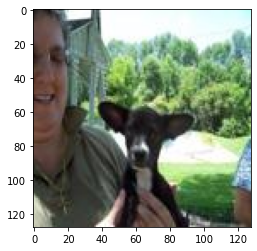

In [6]:
sample = random.choice(filenames)
image = load_img("train/"+sample)
plt.imshow(image)

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(None, 128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.summary()

In [8]:
x_train = np.zeros(shape=(25000,128,128,3))

In [9]:
for i in range(25000):
    x_train[i] = cv.cvtColor(cv.imread("train/"+df['filename'][i]), cv.COLOR_BGR2RGB)

In [10]:
type(x_train[0][0][0][0])
x_train = x_train.astype(int)

In [11]:
y_train = np.zeros(shape=(25000))

In [12]:
for i in range(25000):
    y_train[i] = df['category'][i]

In [13]:
y_train = y_train.astype(int)

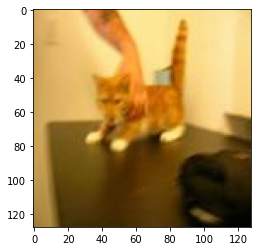

0

In [14]:
plt.imshow(x_train[0], plt.cm.binary)
plt.show()
y_train[0]

In [15]:
import tensorflow as tf
x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
x_train = tf.keras.utils.normalize(x_train, axis=1)

In [ ]:
model.fit(x_train, y_train, epochs=5)

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

In [ ]:
x_train.shape

In [ ]:
y_train.shape